In [24]:
customer_size = 10# , 250, 1000
feature_dim = 3
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [25]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [26]:
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [27]:


from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log


In [28]:
test_input_orig = {'B': [[54.0, 4812728.52, 465537.62899999996],
  [81.0, 4161586.0, 713565.655],
  [68.0, 2061966.0, 361879.305],
  [67.0, 3062594.0, 705979.3267],
  [86.0, 2088139.0, 488351.0433],
  [56.0, 3857302.91, 1308725.887],
  [59.0, 3859440.995, 373874.2263],
  [72.0, 1928973.0, 194058.8443],
  [54.0, 1287183.52, 448324.1264],
  [76.0, 1330283.0, 191457.922],
  [82.0, 4549436.0, 622824.424],
  [53.0, 3587143.8260000004, 609552.4731],
  [60.0, 4190714.0, 1436889.19],
  [53.0, 5454359.826, 737848.9225],
  [58.0, 2196839.3, 300752.9368],
  [88.0, 4361303.0, 597614.6020000001],
  [62.0, 2778115.0, 963668.525],
  [63.0, 1166688.0, 121097.28],
  [70.0, 772613.0, 194550.2367],
  [82.0, 1968270.0, 276948.18],
  [51.0, 1693089.436, 195061.6537],
  [85.0, 2001166.0, 200968.7457],
  [61.0, 3829112.0, 1315752.52],
  [58.0, 1031490.3, 180745.2134],
  [60.0, 1396098.0, 250346.415],
  [57.0, 997542.6049, 175206.0334],
  [61.0, 2214072.0, 258238.04],
  [74.0, 1473332.0, 263283.11],
  [63.0, 2701622.0, 469021.685],
  [58.0, 4890876.3, 827192.3684],
  [56.0, 3842054.91, 1303617.807],
  [70.0, 2824531.0, 489608.9425],
  [56.0, 3209145.91, 436637.3167],
  [57.0, 1618689.605, 279248.1559],
  [72.0, 4598658.0, 449585.8371],
  [51.0, 5111434.436000001, 1153553.6909999999],
  [60.0, 1511986.0, 539515.31],
  [54.0, 4156578.52, 1409571.451],
  [61.0, 1175612.0, 142276.6733],
  [60.0, 3786841.0, 433863.9117],
  [70.0, 1916777.0, 270048.118],
  [58.0, 1990471.3, 682749.0619],
  [53.0, 5333833.826, 1804246.096],
  [71.0, 2096240.0, 367620.2],
  [63.0, 807182.0, 86687.42],
  [65.0, 1607491.0, 285754.7425],
  [79.0, 176860.0, 44215.0],
  [70.0, 4419493.0, 756765.0775],
  [69.0, 4754316.0, 650278.344],
  [65.0, 887685.0, 165187.2375],
  [52.0, 1478432.131, 256490.3231],
  [52.0, 1012073.1309999999, 237833.5875],
  [74.0, 1863432.0, 187785.6343],
  [72.0, 2870284.0, 397818.05600000004],
  [53.0, 863881.8256, 122724.8705],
  [79.0, 2268099.0, 226518.0471],
  [79.0, 3675780.0, 505754.52],
  [76.0, 3888606.0, 667841.505],
  [55.0, 3749457.215, 424297.2322],
  [64.0, 894611.0, 133077.874],
  [56.0, 3807578.91, 646034.1733],
  [88.0, 2032140.0, 713766.9],
  [51.0, 4679580.436000001, 792829.723],
  [59.0, 4333826.995, 586991.6408],
  [81.0, 4271902.0, 488029.0567],
  [78.0, 3085742.0, 304778.1629],
  [81.0, 2149082.0, 215126.42],
  [72.0, 1349583.0, 323406.87],
  [78.0, 622463.0, 69007.17286],
  [71.0, 2259156.0, 394908.63],
  [68.0, 2079213.0, 729536.355],
  [59.0, 1502091.995, 172949.2923],
  [59.0, 5327525.995, 514390.9334],
  [87.0, 4376718.0, 499733.51],
  [82.0, 4368141.0, 598530.894],
  [55.0, 2479498.215, 423727.7158],
  [85.0, 235240.0, 111805.4],
  [69.0, 2744994.0, 635048.66],
  [56.0, 4399819.91, 596187.6327],
  [81.0, 1358684.0, 488159.14],
  [65.0, 3002393.0, 519400.8275],
  [63.0, 121815.0, 30453.75],
  [57.0, 4372761.605, 1481110.4319999998],
  [60.0, 719574.0, 182704.86],
  [58.0, 2600909.3, 443622.8959],
  [73.0, 3716034.0, 511148.55600000004],
  [63.0, 3122391.0, 1079000.985],
  [68.0, 859230.0, 91669.15714],
  [54.0, 3792220.52, 643755.7607],
  [65.0, 3365270.0, 1160365.45],
  [65.0, 2904603.0, 287440.5729],
  [72.0, 1263399.0, 304159.11],
  [86.0, 3586437.0, 617228.1975],
  [70.0, 3860829.0, 530551.086],
  [62.0, 4609738.0, 788631.115],
  [68.0, 1453153.0, 346537.5033],
  [62.0, 739554.0, 112300.23599999999],
  [67.0, 4569887.0, 781956.0725],
  [57.0, 2335669.605, 266228.2039],
  [52.0, 2175977.131, 248886.0737],
  [57.0, 5313667.605, 898156.9709],
  [56.0, 2964139.91, 504758.1408],
  [83.0, 1402393.0, 251400.8275],
  [54.0, 3582355.52, 486882.6986],
  [73.0, 1802451.0, 254728.43399999998],
  [61.0, 3153350.0, 435748.9],
  [67.0, 4731584.0, 647232.256],
  [84.0, 3063761.0, 1059359.935],
  [83.0, 2670198.0, 463758.165],
  [81.0, 675807.0, 259395.345],
  [64.0, 1182794.0, 171694.396],
  [66.0, 2726355.0, 946328.925],
  [64.0, 4827381.0, 550057.545]],
 'G': [[29.0, 984042.0749, 238926.2595],
  [42.0, 3724968.183, 1268511.4],
  [26.0, 470375.5327, 74700.90962],
  [49.0, 4025333.046, 911383.2039],
  [30.0, 1268209.922, 226719.2796],
  [38.0, 1093747.702, 262544.8298],
  [19.0, 726588.1008, 136806.4481],
  [49.0, 1644669.0459999999, 227820.9463],
  [22.0, 592800.1431, 76117.5846],
  [36.0, 1658541.507, 233326.9149],
  [44.0, 1294139.572, 129598.7372],
  [17.0, 2428664.906, 422051.3718],
  [31.0, 2213510.27, 255136.0978],
  [49.0, 1396914.0459999999, 194621.7763],
  [32.0, 1224328.117, 219222.0185],
  [45.0, 2047264.267, 235199.4118],
  [31.0, 2460075.77, 243590.4455],
  [44.0, 4245370.572, 721128.9826],
  [41.0, 3025443.488, 344821.5816],
  [40.0, 735548.7929, 133822.0699],
  [30.0, 1941566.9219999998, 452675.4362],
  [37.0, 1240354.354, 126593.5806],
  [20.0, 2621992.4480000003, 363370.5175],
  [49.0, 1808801.0459999999, 312268.2929],
  [28.0, 3211856.455, 440294.6473],
  [34.0, 1330511.312, 315814.193],
  [31.0, 616605.7698, 94001.64374],
  [24.0, 1381277.3380000002, 196879.3986],
  [22.0, 1268145.643, 227296.7482],
  [31.0, 2550689.77, 252263.4998],
  [49.0, 4414137.046, 598929.6583],
  [26.0, 2602194.5330000003, 450455.8195],
  [48.0, 1257269.352, 220033.7929],
  [41.0, 3327969.488, 454324.3819],
  [32.0, 879965.1172, 161541.216],
  [42.0, 2709112.183, 928199.64],
  [45.0, 3848175.267, 654451.7102],
  [24.0, 1124201.838, 161019.5169],
  [38.0, 2259744.202, 392213.0361],
  [19.0, 497975.6008, 65675.90288],
  [47.0, 1648314.657, 228544.7522],
  [27.0, 1624106.88, 286552.6083],
  [35.0, 444270.1594, 68614.5543],
  [45.0, 3607186.267, 491268.8421],
  [27.0, 380855.8801, 78308.0658],
  [36.0, 2583586.5069999998, 297735.7874],
  [18.0, 722039.2534, 181490.7274],
  [28.0, 1198800.228, 143493.4764],
  [32.0, 585084.6172, 149531.6429],
  [27.0, 1257942.88, 297646.4589],
  [33.0, 2581940.465, 446548.5572],
  [19.0, 1001347.1009999999, 121885.7204],
  [35.0, 558070.6594, 85922.64482999999],
  [31.0, 867052.2698, 127561.4747],
  [28.0, 1725251.2280000001, 173383.2898],
  [44.0, 3110834.5719999997, 531094.2026],
  [29.0, 1750407.075, 175749.0469],
  [49.0, 3879527.046, 659114.8979],
  [36.0, 1160953.007, 208312.5698],
  [38.0, 1838070.2019999998, 321582.6411],
  [44.0, 3666225.5719999997, 499297.7561],
  [38.0, 2765796.202, 272558.1406],
  [49.0, 4356037.046, 422245.8988],
  [29.0, 1591238.575, 185845.1703],
  [48.0, 4310995.352, 585226.3183],
  [22.0, 3402745.2860000003, 1169684.377],
  [49.0, 3626934.046, 822407.4272],
  [42.0, 2735285.183, 468483.7975],
  [39.0, 640349.0491, 161187.7582],
  [24.0, 3660964.6760000004, 837262.5031],
  [43.0, 854877.8774, 153368.5151],
  [36.0, 4276116.0139999995, 584081.8988],
  [27.0, 1591416.88, 281077.0333],
  [24.0, 2550759.338, 441987.4832],
  [23.0, 616808.4905, 118124.2457],
  [46.0, 3585934.962, 610379.4002],
  [45.0, 2194975.267, 215737.5487],
  [47.0, 4947357.657, 479011.7959],
  [27.0, 538536.3801, 136979.0072],
  [46.0, 2636829.962, 451404.3127],
  [43.0, 3970797.877, 385877.2086],
  [29.0, 422825.0749, 170381.6942]]}

print("Length of test_input_orig for class \"G\" = ", len(test_input_orig['G']))
print("Length of test_input_orig for class \"B\" = ", len(test_input_orig['B']))

Length of test_input_orig for class "G" =  82
Length of test_input_orig for class "B" =  113


In [29]:
training_input_orig ={'B': [[68.0, 1699009.0, 301084.0075],
  [70.0, 4264850.0, 730862.375],
  [73.0, 4540245.0, 621592.83],
  [88.0, 2146677.0, 214896.2271],
  [51.0, 1779859.436, 204750.9704],
  [75.0, 4841793.0, 472857.33],
  [83.0, 3191341.0, 314885.4957],
  [57.0, 2713885.605, 616924.6478],
  [67.0, 2928718.0, 289748.7229],
  [64.0, 3025680.0, 523301.4],
  [56.0, 4824933.91, 653152.9087],
  [69.0, 3190217.0, 550861.3475],
  [81.0, 1793467.0, 211270.4817],
  [79.0, 2504863.0, 872129.105],
  [54.0, 4007239.52, 679771.4432],
  [61.0, 924591.0, 97925.13857000001],
  [53.0, 3549825.8260000004, 804402.2775],
  [76.0, 2710973.0, 268907.4157],
  [60.0, 2284715.0, 266126.5083],
  [59.0, 5170409.995, 873867.2035],
  [85.0, 1245050.0, 128597.6429],
  [84.0, 3905604.0, 536550.936],
  [71.0, 1133323.0, 137554.4017],
  [76.0, 1645349.0, 584191.915],
  [83.0, 2820634.0, 325970.7967],
  [64.0, 691010.0, 88162.78332999999],
  [77.0, 2919935.0, 404471.29],
  [62.0, 3547942.0, 488624.22799999994],
  [57.0, 4259702.605, 577294.2667],
  [76.0, 4254583.0, 729142.6525],
  [51.0, 5497354.436000001, 743845.4944],
  [60.0, 1084833.0, 158567.622],
  [52.0, 1632908.131, 225892.0425],
  [64.0, 1622706.0, 164744.7171],
  [66.0, 3289125.0, 1134856.875],
  [86.0, 4638331.0, 634736.3539999999],
  [60.0, 2270881.0, 317498.054],
  [79.0, 4480072.0, 613529.6479999999],
  [62.0, 561837.0, 63204.398570000005],
  [57.0, 3750189.605, 424182.9373],
  [55.0, 2435196.215, 416307.1308],
  [66.0, 3256180.0, 321091.5143],
  [86.0, 2168556.0, 253155.42],
  [54.0, 4184612.52, 709481.4207],
  [56.0, 4109267.91, 696567.0808],
  [63.0, 4534572.0, 1552081.62],
  [83.0, 1407232.0, 252211.36],
  [51.0, 4552299.436000001, 514340.1037],
  [71.0, 1376852.0, 329496.9467],
  [53.0, 3107357.8260000004, 302393.3247],
  [70.0, 1896744.0, 222803.08],
  [82.0, 1540631.0, 366074.2567],
  [55.0, 1171073.215, 163653.2226],
  [53.0, 3301626.8260000004, 374485.5838],
  [72.0, 1728032.0, 305945.36],
  [70.0, 104659.0, 20931.8],
  [78.0, 3080442.0, 1064948.07],
  [51.0, 3331265.436, 323992.5489],
  [88.0, 110706.0, 18451.0],
  [54.0, 1974017.52, 226137.8388],
  [51.0, 4492253.436000001, 507634.967],
  [60.0, 323985.0, 40438.564289999995],
  [82.0, 823199.0, 102923.8883],
  [70.0, 4338923.0, 495513.0683],
  [84.0, 553124.0, 87318.616],
  [59.0, 2293732.995, 224013.6034],
  [72.0, 4744687.0, 1081646.763],
  [80.0, 3128166.0, 432374.244],
  [54.0, 4613189.52, 446438.8961],
  [70.0, 2987078.0, 516835.565],
  [79.0, 3371988.0, 775077.32],
  [56.0, 3312067.91, 1126072.162],
  [65.0, 602889.0, 67133.66143],
  [51.0, 3163739.436, 359284.237],
  [65.0, 765190.0, 192892.4333],
  [85.0, 2305692.0, 536937.88],
  [60.0, 2840398.0, 328177.7767],
  [86.0, 536071.0, 141722.5233],
  [87.0, 3103473.0, 536331.7275],
  [75.0, 3794754.0, 434747.53],
  [75.0, 1127527.0, 136907.1817],
  [71.0, 1328031.0, 191156.15399999998],
  [61.0, 3637814.0, 417222.5633],
  [55.0, 1521317.215, 175488.2655],
  [57.0, 4840318.605, 655096.8107],
  [83.0, 4013051.0, 918248.0567],
  [82.0, 2457217.0, 285389.2317],
  [78.0, 643096.0, 82812.38667],
  [56.0, 4131864.91, 560281.6627],
  [51.0, 803754.436, 143628.86800000002],
  [65.0, 1570247.0, 186344.2483],
  [78.0, 455491.0, 185589.485],
  [68.0, 1717043.0, 202736.4683],
  [62.0, 2760525.0, 383110.35],
  [51.0, 1766710.436, 174242.2846],
  [74.0, 3567165.0, 491200.11],
  [69.0, 3517974.0, 346148.94],
  [58.0, 2172295.3, 297464.0408],
  [61.0, 3484773.0, 342971.13],
  [61.0, 2780354.0, 275548.1686],
  [53.0, 2403507.826, 235024.8247],
  [68.0, 3212470.0, 443670.98],
  [64.0, 2210298.0, 309379.932],
  [58.0, 4936005.3, 556500.9839999999],
  [54.0, 2055196.52, 470405.6543],
  [85.0, 557082.0, 87848.98800000001],
  [80.0, 629616.0, 69691.81714],
  [54.0, 2443994.52, 278618.6038],
  [87.0, 4657040.0, 637243.36],
  [60.0, 1200924.0, 217654.77],
  [73.0, 4220239.0, 578712.0260000001],
  [67.0, 1820860.0, 257195.24],
  [53.0, 1984459.826, 227401.9354],
  [56.0, 949239.9101, 167262.3908],
  [76.0, 1894550.0, 267069.7],
  [52.0, 2814939.131, 384284.1965],
  [56.0, 4346267.91, 490843.0539],
  [84.0, 4557325.0, 1559703.875],
  [65.0, 1669655.0, 169238.4071],
  [76.0, 4865942.0, 1108727.047],
  [84.0, 83550.0, 27850.0],
  [83.0, 2184900.0, 218554.7143],
  [56.0, 2427227.91, 276550.2539],
  [59.0, 3942203.995, 534514.1588],
  [63.0, 1592305.0, 283211.0875],
  [74.0, 3598414.0, 353848.1971],
  [52.0, 3562097.131, 484403.3685],
  [73.0, 1240878.0, 128198.3229],
  [68.0, 927650.0, 114587.5833],
  [55.0, 5505543.215, 1861180.507],
  [73.0, 1618065.0, 191683.925],
  [87.0, 1852563.0, 261443.44199999998],
  [77.0, 1213806.0, 175850.004],
  [55.0, 1321277.215, 229725.6983],
  [54.0, 4945217.52, 836882.7582],
  [59.0, 4908188.995, 663956.1488],
  [86.0, 173875.0, 24839.28571],
  [51.0, 1649173.436, 228189.2404],
  [66.0, 1121032.0, 163418.288],
  [81.0, 925196.0, 97983.04571],
  [86.0, 617036.0, 119853.53],
  [80.0, 3391330.0, 467638.22],
  [60.0, 410733.0, 48741.587139999996],
  [83.0, 4413251.0, 1007626.057],
  [71.0, 3394618.0, 468078.81200000003],
  [66.0, 3145334.0, 1086686.89],
  [52.0, 2556630.131, 349670.7905],
  [63.0, 412585.0, 68486.39],
  [75.0, 244064.0, 57380.72],
  [56.0, 937728.9101, 165334.2983],
  [61.0, 2043131.0, 478299.2567],
  [58.0, 3349180.3, 379305.5256],
  [71.0, 1557657.0, 554815.095],
  [59.0, 4760552.995, 644172.9248],
  [61.0, 4372765.0, 748938.1375],
  [68.0, 2771978.0, 384645.052],
  [67.0, 2799842.0, 485473.535],
  [83.0, 2441404.0, 425435.17],
  [66.0, 1365891.0, 490573.485],
  [78.0, 860420.0, 321240.7],
  [63.0, 3989026.0, 547729.4839999999],
  [76.0, 3243076.0, 373143.4867],
  [85.0, 141436.0, 35359.0],
  [58.0, 4936720.3, 667896.9908],
  [87.0, 1497852.0, 267390.21],
  [53.0, 3773269.8260000004, 512582.8625],
  [64.0, 1747625.0, 206151.4583],
  [82.0, 1458809.0, 173900.3383],
  [83.0, 3618240.0, 415036.8],
  [54.0, 1821207.52, 418148.1109],
  [71.0, 1821316.0, 183754.5314],
  [76.0, 1032737.0, 151586.758],
  [57.0, 2730446.605, 310311.6356],
  [81.0, 4761656.0, 651261.904],
  [72.0, 2114783.0, 247150.7683],
  [84.0, 3127939.0, 540429.7825],
  [72.0, 1880805.0, 331534.8375],
  [78.0, 1041707.0, 109134.8129],
  [60.0, 427566.0, 176234.61],
  [61.0, 112963.0, 18827.16667],
  [71.0, 1147963.0, 208783.8025],
  [60.0, 1248979.0, 128973.7043],
  [54.0, 4037058.52, 913021.5009],
  [67.0, 4806850.0, 547764.9167],
  [69.0, 2464946.0, 286252.3033],
  [82.0, 701447.0, 267984.745],
  [62.0, 4159315.0, 570548.21],
  [77.0, 1387962.0, 248983.635],
  [52.0, 5107007.131, 1728553.271],
  [51.0, 5232538.436000001, 505971.536],
  [57.0, 3588974.605, 348154.7962],
  [51.0, 1798283.436, 206808.31699999998],
  [70.0, 1151256.0, 209335.38],
  [53.0, 1186336.826, 138278.2004],
  [65.0, 4657043.0, 637243.762],
  [68.0, 950093.0, 175640.5775],
  [77.0, 3597623.0, 1238203.705],
  [86.0, 156015.0, 31203.0],
  [57.0, 4283607.605, 580497.5367],
  [58.0, 4487022.3, 1519093.6469999999],
  [88.0, 4368757.0, 427581.0271],
  [58.0, 4110336.3, 1392903.8369999998],
  [61.0, 3145545.0, 543378.7875],
  [61.0, 342445.0, 147719.075],
  [58.0, 3825193.3, 648690.4659],
  [78.0, 291269.0, 52230.045999999995],
  [59.0, 5268485.995, 890294.9335],
  [79.0, 3658027.0, 359554.0129],
  [72.0, 2474368.0, 246260.9371],
  [77.0, 4287012.0, 587659.608],
  [56.0, 1880403.91, 323232.3608],
  [77.0, 539710.0, 85521.14],
  [57.0, 5196075.605, 878460.3109],
  [84.0, 3425710.0, 337317.9571],
  [73.0, 3728855.0, 641083.2125],
  [71.0, 3369760.0, 331962.7429],
  [70.0, 3130576.0, 432697.184],
  [69.0, 1559767.0, 222208.77800000002],
  [52.0, 2734414.131, 373493.8465],
  [77.0, 1513510.0, 540025.85],
  [60.0, 1696920.0, 240587.28],
  [78.0, 887854.0, 220287.3933],
  [68.0, 3044743.0, 526494.4525],
  [55.0, 5482055.215, 926656.0133],
  [66.0, 562020.0, 221276.7],
  [54.0, 4695234.52, 1060014.1409999998],
  [52.0, 2260300.131, 309962.5705],
  [71.0, 3034371.0, 524757.1425],
  [82.0, 4089292.0, 701456.41],
  [78.0, 1055105.0, 154584.07],
  [62.0, 2431145.0, 242123.8786],
  [62.0, 2044186.0, 358901.155],
  [72.0, 4184628.0, 956566.92],
  [54.0, 1307998.52, 227648.5757],
  [74.0, 804333.0, 120980.62199999999],
  [75.0, 2746333.0, 317673.8517],
  [68.0, 3126582.0, 432161.98799999995],
  [51.0, 1532941.436, 265767.6905],
  [56.0, 2974882.91, 675410.1244],
  [86.0, 1181131.0, 122479.6814],
  [62.0, 1272747.0, 306246.83],
  [56.0, 1428873.91, 495202.1717],
  [70.0, 1598777.0, 379060.1967],
  [59.0, 5583546.995, 754454.1208],
  [68.0, 3847347.0, 881240.83],
  [79.0, 4093183.0, 702108.1525],
  [59.0, 5351035.995, 602748.039],
  [63.0, 3673470.0, 631806.225],
  [60.0, 3032837.0, 524500.1975],
  [68.0, 3628026.0, 416129.57],
  [87.0, 4094640.0, 468234.8],
  [62.0, 2595571.0, 451258.1425],
  [58.0, 4703038.3, 795729.5034],
  [70.0, 406577.0, 67681.318],
  [81.0, 1628719.0, 231448.34600000002],
  [59.0, 2228542.995, 381104.481],
  [82.0, 1727780.0, 174801.8],
  [81.0, 807627.0, 121422.01800000001],
  [74.0, 1038926.0, 152416.084],
  [68.0, 4666694.0, 638536.996],
  [54.0, 4653146.52, 525307.2438],
  [76.0, 4166655.0, 571531.77],
  [73.0, 2227195.0, 311644.13],
  [51.0, 3269053.436, 1113132.9009999998],
  [62.0, 1365009.0, 163426.005],
  [63.0, 893159.0, 132883.30599999998],
  [63.0, 2574163.0, 447672.3025],
  [68.0, 3423502.0, 786582.1133],
  [71.0, 821790.0, 88085.61429],
  [54.0, 5058731.52, 684717.0826],
  [66.0, 2853378.0, 494440.815],
  [52.0, 3136309.131, 1068369.4409999999],
  [70.0, 2811347.0, 487400.6225],
  [66.0, 4572039.0, 447038.0186],
  [64.0, 1109393.0, 115613.33],
  [56.0, 4124029.91, 699039.7158],
  [70.0, 4951398.0, 845859.165],
  [81.0, 1398855.0, 200646.57],
  [85.0, 581336.0, 151831.7067],
  [82.0, 3021093.0, 696710.77],
  [53.0, 2220121.826, 380576.2881],
  [59.0, 4856015.995, 1642412.417],
  [67.0, 1587497.0, 161374.7129],
  [51.0, 5461394.436000001, 739026.8544],
  [72.0, 2468337.0, 859892.895],
  [73.0, 3380301.0, 776933.89],
  [65.0, 4051784.0, 1390347.64],
  [55.0, 3448817.215, 781451.531],
  [54.0, 3506547.52, 595905.5332],
  [76.0, 3176199.0, 438810.666],
  [75.0, 2171741.0, 217295.21],
  [55.0, 2733125.215, 466210.2383],
  [75.0, 2802919.0, 971977.865],
  [63.0, 4280226.0, 488958.57],
  [70.0, 4270966.0, 731886.805],
  [65.0, 4327388.0, 423621.4229],
  [71.0, 3751837.0, 368532.97],
  [66.0, 4230809.0, 414377.4329],
  [55.0, 1725776.215, 169988.1604],
  [52.0, 5277473.131, 892829.6906],
  [63.0, 2281216.0, 227773.5314],
  [65.0, 1811310.0, 213262.95],
  [84.0, 609694.0, 158164.9933],
  [71.0, 4065427.0, 697459.0225],
  [71.0, 4971582.0, 485279.9914],
  [58.0, 2147241.3, 367633.5059],
  [58.0, 1053720.3, 184468.7384],
  [61.0, 1745886.0, 308935.905],
  [59.0, 3383186.995, 459605.8808],
  [75.0, 1572765.0, 223950.51],
  [76.0, 1721453.0, 304843.3775],
  [87.0, 1548341.0, 220677.694],
  [77.0, 3047884.0, 351347.0467],
  [70.0, 2912147.0, 1008569.245],
  [70.0, 2297395.0, 802627.325],
  [88.0, 1860528.0, 262510.752],
  [64.0, 846079.0, 316436.465],
  [55.0, 2811726.215, 479375.9058],
  [71.0, 4542162.0, 621849.708],
  [85.0, 2999696.0, 518949.08],
  [61.0, 2015099.0, 236019.3883],
  [77.0, 1692636.0, 300016.53],
  [72.0, 741442.0, 112553.228],
  [78.0, 3460217.0, 596086.3475],
  [56.0, 3039413.91, 517366.5358],
  [63.0, 4366252.0, 747847.21],
  [87.0, 2897836.0, 501887.53],
  [71.0, 2996914.0, 345655.3967],
  [75.0, 307918.0, 54461.012],
  [66.0, 621639.0, 68928.30429],
  [59.0, 4150722.995, 562455.7048],
  [68.0, 2654752.0, 614894.6133],
  [52.0, 5133513.131, 694973.1125],
  [66.0, 1364296.0, 140011.1886],
  [62.0, 3191741.0, 440893.294],
  [61.0, 2514038.0, 350081.092],
  [53.0, 3241742.8260000004, 441358.2445],
  [62.0, 1775213.0, 251078.542],
  [64.0, 3672132.0, 1263164.22],
  [56.0, 4298124.91, 728200.6283],
  [78.0, 3316355.0, 571989.4625],
  [80.0, 1602908.0, 227989.672],
  [82.0, 3214092.0, 554860.41],
  [58.0, 4678544.3, 633301.4068],
  [54.0, 3299879.52, 748384.8576],
  [71.0, 1974327.0, 347199.7725],
  [83.0, 1637336.0, 581507.56],
  [64.0, 2083598.0, 365502.665],
  [80.0, 3220708.0, 555968.59],
  [71.0, 1718584.0, 202908.5467],
  [81.0, 2023226.0, 473853.8067],
  [52.0, 1932288.131, 221674.1354],
  [51.0, 2251381.4359999998, 220632.2232],
  [88.0, 4840513.0, 827285.9275],
  [73.0, 648646.0, 125148.205],
  [55.0, 5147448.215, 580406.2272],
  [64.0, 2915258.0, 336537.1433],
  [68.0, 1862822.0, 262818.148],
  [60.0, 4250478.0, 485636.71],
  [86.0, 3961644.0, 680075.37],
  [78.0, 2618923.0, 455169.6025],
  [74.0, 235625.0, 37311.45833],
  [54.0, 2402346.52, 547935.8209],
  [67.0, 1817827.0, 213990.6817],
  [57.0, 4176426.605, 707669.1034],
  [86.0, 1709721.0, 201918.845],
  [65.0, 4987200.0, 681484.8],
  [76.0, 1443414.0, 206617.47600000002],
  [58.0, 1059258.3, 185396.3534],
  [59.0, 4523584.995, 1020698.688],
  [83.0, 2620792.0, 364386.12799999997],
  [56.0, 2130789.91, 292137.6127],
  [84.0, 4963342.0, 847859.785],
  [59.0, 5486100.995, 529568.8263],
  [73.0, 3253714.0, 561497.095],
  [65.0, 4254522.0, 1458264.87],
  [79.0, 2373248.0, 331215.232],
  [83.0, 2170250.0, 304013.5],
  [63.0, 2559866.0, 356222.044],
  [54.0, 1539828.52, 213184.0806],
  [58.0, 5102938.3, 575141.8356],
  [75.0, 1668323.0, 295944.1025],
  [75.0, 273849.0, 62369.7075],
  [65.0, 3000334.0, 415244.756],
  [52.0, 943694.1308, 95383.83319],
  [88.0, 1503015.0, 153288.5786],
  [70.0, 282382.0, 63798.985],
  [57.0, 2889187.605, 281175.1834],
  [63.0, 3767276.0, 647518.73],
  [58.0, 5680680.3, 767587.6308],
  [58.0, 4661584.3, 1051714.611],
  [69.0, 360589.0, 61518.926],
  [63.0, 3923363.0, 898217.7367],
  [77.0, 4477818.0, 511023.01],
  [61.0, 148733.0, 29746.6],
  [53.0, 2984521.8260000004, 508613.2881],
  [61.0, 3437736.0, 1184641.56],
  [82.0, 67499.0, 16874.75],
  [85.0, 2387708.0, 237966.3371],
  [72.0, 3399755.0, 468767.17],
  [52.0, 1466091.131, 203538.5645],
  [64.0, 2349062.0, 234267.3629],
  [67.0, 1713076.0, 242752.18399999998],
  [57.0, 5279351.605, 1784818.082],
  [61.0, 1871448.0, 219978.36],
  [85.0, 1195902.0, 433627.17],
  [84.0, 2428337.0, 846492.895],
  [57.0, 4327763.605, 586414.4407],
  [66.0, 1738102.0, 246105.668],
  [87.0, 2207639.0, 309023.626],
  [51.0, 2714338.436, 618202.2507],
  [66.0, 2752450.0, 382028.3],
  [51.0, 3648116.436, 620059.503],
  [62.0, 401691.0, 167566.485],
  [67.0, 461656.0, 53615.645710000004]],
 'G': [[39.0, 2029850.549, 467686.2305],
  [31.0, 2527240.77, 583377.8896],
  [27.0, 1070703.88, 193857.6058],
  [22.0, 2560665.143, 443793.7644],
  [35.0, 1229014.659, 173770.3173],
  [34.0, 1197052.312, 214506.2623],
  [18.0, 2210622.753, 385455.7818],
  [25.0, 411467.3706, 66866.03942],
  [37.0, 1656667.354, 233016.9549],
  [47.0, 1763066.657, 304901.9003],
  [46.0, 1587261.9619999998, 157486.6701],
  [47.0, 1779041.657, 307577.7128],
  [45.0, 3785055.267, 1287758.22],
  [34.0, 3349208.624, 459993.9556],
  [24.0, 1040415.838, 126003.29800000001],
  [46.0, 2008645.9619999998, 346183.4927],
  [38.0, 1691302.2019999998, 197999.3341],
  [44.0, 5090197.572, 1150183.34],
  [31.0, 3811247.54, 372916.8863],
  [48.0, 812594.3515, 97033.82023],
  [30.0, 899861.9224, 110013.9931],
  [40.0, 2303298.793, 264280.1299],
  [41.0, 5313741.488, 900522.2874],
  [49.0, 2020149.0459999999, 463558.7772],
  [45.0, 2826023.267, 276137.8572],
  [40.0, 2863516.793, 326837.8066],
  [39.0, 1389510.049, 197100.2289],
  [42.0, 2141626.183, 210883.38],
  [20.0, 2572558.9480000003, 297288.6904],
  [32.0, 1019920.1170000001, 147986.9428],
  [42.0, 1997154.1830000002, 229897.9033],
  [26.0, 2459293.5330000003, 243725.6583],
  [26.0, 1184729.533, 121731.6754],
  [25.0, 560587.6853, 62034.401139999994],
  [22.0, 1252659.143, 149801.8396],
  [39.0, 413706.0491, 82928.11616],
  [21.0, 894249.5913, 94138.67937],
  [43.0, 4971580.877, 842916.2676],
  [31.0, 2221939.27, 772790.8318],
  [40.0, 4132564.793, 562257.7999],
  [43.0, 4630737.877, 449042.8943],
  [38.0, 403989.2016, 46499.47065],
  [17.0, 418881.906, 68330.1754],
  [26.0, 2099226.5330000003, 292966.9436],
  [18.0, 1411218.753, 503111.2236],
  [34.0, 1433168.812, 254055.776],
  [29.0, 1766386.575, 206824.9322],
  [29.0, 2329703.575, 323674.3967],
  [37.0, 2064525.354, 359587.4086],
  [49.0, 5076971.046, 687749.4143],
  [18.0, 1816433.253, 255543.2324],
  [35.0, 2405764.659, 238224.0292],
  [20.0, 298274.4482, 51992.30548],
  [19.0, 1125393.601, 162885.0955],
  [22.0, 1361009.1430000002, 485702.7688],
  [43.0, 3780969.877, 428992.6167],
  [35.0, 1805936.159, 313847.2479],
  [18.0, 775769.7534, 290235.8086],
  [35.0, 2486441.659, 573873.9314],
  [22.0, 584718.6431, 90258.18052000001],
  [40.0, 2546102.793, 249765.6371],
  [41.0, 5331568.488, 602338.8733],
  [17.0, 1007502.906, 147205.3894],
  [29.0, 1617770.075, 570688.2692],
  [22.0, 1746574.1430000002, 203877.2499],
  [30.0, 1532476.9219999998, 361312.0029],
  [23.0, 3353985.981, 768801.9671],
  [41.0, 2532344.488, 347710.6319],
  [20.0, 2630451.9480000003, 260360.0646],
  [28.0, 466929.7275, 92651.90582999999],
  [43.0, 4148821.877, 705104.1351],
  [36.0, 947917.0068, 226642.6413],
  [24.0, 2350100.338, 326701.6806],
  [30.0, 3953591.845, 676520.7516],
  [18.0, 2298426.753, 266775.3012],
  [39.0, 1076093.049, 155102.3509],
  [21.0, 2583248.796, 255800.0318],
  [29.0, 1048474.075, 189987.0546],
  [25.0, 1736929.185, 407463.2043],
  [22.0, 3773975.2860000003, 647023.2134],
  [46.0, 2394189.962, 410762.1127],
  [29.0, 1906642.075, 266984.1557],
  [20.0, 2430208.4480000003, 422089.3268],
  [32.0, 1987830.6169999999, 231405.7915],
  [45.0, 1576488.267, 182629.4251],
  [49.0, 2982952.046, 407150.8683],
  [22.0, 1578355.1430000002, 558513.6788],
  [28.0, 1052424.228, 152577.7877],
  [26.0, 2607936.0330000003, 451417.5208],
  [21.0, 801405.2956, 118117.7214],
  [26.0, 597214.5327, 75139.93654],
  [38.0, 2718064.202, 375185.3089],
  [36.0, 1592790.507, 280645.3511],
  [34.0, 2480336.624, 429456.3845],
  [29.0, 609243.0749, 155221.1495],
  [45.0, 4557656.267, 773289.7777],
  [43.0, 2739831.877, 469098.3101],
  [19.0, 1816126.601, 319304.1468],
  [23.0, 4902602.981000001, 834303.6464],
  [20.0, 832100.4482, 123524.9895],
  [36.0, 1012701.507, 103333.3627],
  [49.0, 4105931.046, 697037.5679],
  [26.0, 492940.5327, 129541.0327],
  [39.0, 2250697.549, 390624.1924],
  [23.0, 1461789.49, 148376.3218],
  [47.0, 4565010.657, 516151.6802],
  [23.0, 965256.9809, 100851.0673],
  [20.0, 810520.4482, 99547.33241],
  [49.0, 4968720.046, 673243.7803],
  [37.0, 1642837.854, 231163.8019],
  [49.0, 4505312.046, 436533.6488],
  [22.0, 587771.6431, 226668.2063],
  [44.0, 4644434.572, 1050629.603],
  [29.0, 1424783.575, 202415.1167],
  [42.0, 1005669.183, 238364.1567],
  [26.0, 470575.0327, 186819.1065],
  [37.0, 1656368.354, 291221.1111],
  [28.0, 1637427.7280000001, 192473.5472],
  [28.0, 2418860.455, 839200.6054],
  [47.0, 3792796.6569999997, 515905.3402],
  [49.0, 2123152.046, 243281.3903],
  [48.0, 1075598.352, 151683.1203],
  [40.0, 3911150.793, 532588.3239],
  [46.0, 4500396.962, 763551.7852],
  [20.0, 2050118.448, 286739.4015],
  [32.0, 1682745.6169999999, 169146.8284],
  [32.0, 1193236.617, 214014.1922],
  [44.0, 3980794.5719999997, 541450.0021],
  [44.0, 5300792.572, 1795824.335],
  [33.0, 2443655.965, 338708.7228],
  [37.0, 1453873.354, 514606.3972],
  [32.0, 884865.1172, 160009.0248],
  [35.0, 1590519.159, 280338.4298],
  [35.0, 1267367.659, 150807.0357],
  [46.0, 5291731.962, 597400.2652],
  [34.0, 958434.312, 349075.4945],
  [21.0, 1744284.7959999999, 175499.1918],
  [45.0, 4078212.267, 554386.3261],
  [41.0, 5265030.488, 892363.1949],
  [48.0, 1174410.352, 164923.9283],
  [26.0, 635217.0327, 119075.3236],
  [20.0, 221803.4482, 41745.19148],
  [42.0, 4267068.183, 725057.45],
  [37.0, 347274.8542, 57558.359879999996],
  [44.0, 1683633.572, 389384.0468],
  [46.0, 2992290.962, 510944.0302],
  [28.0, 489577.7275, 55111.68332999999],
  [29.0, 1641771.15, 289364.3147],
  [46.0, 918309.9619, 130841.7702],
  [46.0, 1103903.962, 259518.9436],
  [38.0, 455928.2016, 90073.85613],
  [49.0, 2187545.046, 300566.3303],
  [31.0, 476003.7698, 62634.14645],
  [24.0, 567950.3379, 62781.128979999994],
  [48.0, 1151118.352, 202253.5004],
  [49.0, 4334889.046, 588310.4263],
  [38.0, 603263.7016, 65572.88707000001],
  [34.0, 2196462.312, 254604.9582],
  [42.0, 2968821.183, 507601.0775],
  [20.0, 1752079.448, 617005.4387],
  [46.0, 2008679.9619999998, 276951.3502],
  [49.0, 5001416.046, 847031.3054],
  [17.0, 180866.40600000002, 43966.6015],
  [48.0, 2459348.352, 421382.0254],
  [47.0, 1971304.657, 679563.5306],
  [35.0, 3794789.3189999997, 649553.6815],
  [38.0, 2764683.702, 381432.3219],
  [25.0, 2330347.685, 323996.0016],
  [31.0, 695749.7698, 130758.6747],
  [44.0, 3782350.5719999997, 643573.1326],
  [21.0, 1381640.2959999999, 140788.9325],
  [42.0, 2925255.183, 285887.87],
  [45.0, 1319091.267, 230830.1402],
  [38.0, 837419.2016, 102649.0658],
  [31.0, 2126292.77, 296299.7017],
  [45.0, 4053301.267, 688810.3152],
  [19.0, 587963.1008, 75724.50704],
  [30.0, 1202623.422, 123276.3091],
  [48.0, 3187737.352, 543387.1829],
  [46.0, 4402637.962, 498118.1018],
  [28.0, 2132974.228, 297371.4877],
  [41.0, 2291328.488, 225296.0628],
  [47.0, 749640.6567, 180204.0604],
  [24.0, 1233446.838, 177070.1116],
  [44.0, 2840035.5719999997, 485735.3701],
  [38.0, 2355533.403, 816515.4548],
  [36.0, 1041091.007, 185588.62600000002],
  [49.0, 2073345.0459999999, 237719.6086],
  [43.0, 4026090.877, 684546.6926],
  [20.0, 409426.4482, 83608.34184],
  [20.0, 324916.9482, 55562.40048],
  [49.0, 1331070.0459999999, 154832.2336],
  [26.0, 1073801.033, 388899.8165],
  [17.0, 2171618.406, 303196.8664],
  [18.0, 1708689.753, 300058.4749],
  [48.0, 2722654.352, 310323.8536],
  [32.0, 2717038.117, 312833.9623],
  [45.0, 4310055.267, 731816.6102],
  [46.0, 2273568.962, 390558.0952],
  [22.0, 3530238.2860000003, 1212394.5320000001],
  [31.0, 1506109.54, 176143.0162],
  [25.0, 1707340.185, 300641.2457],
  [23.0, 2323861.99, 402364.5305],
  [25.0, 660944.6853, 125369.9995],
  [44.0, 3212000.5719999997, 548039.5076],
  [44.0, 855851.5722, 122707.6401],
  [47.0, 2106400.6569999997, 241606.8969],
  [44.0, 4576089.572, 517682.9434],
  [48.0, 3998023.352, 905480.1171],
  [44.0, 5531133.572000001, 535139.5915],
  [34.0, 1978123.312, 345335.6548],
  [48.0, 2772262.352, 631726.8271],
  [21.0, 2115817.796, 295484.2905],
  [47.0, 2180034.6569999997, 249829.3602],
  [33.0, 1844210.965, 258383.0928],
  [43.0, 4927196.877, 556987.965],
  [35.0, 639221.1594, 69140.57987999999],
  [39.0, 992178.0491, 119881.4508],
  [36.0, 1780578.507, 178342.7663],
  [48.0, 3966139.352, 385011.1531],
  [41.0, 5114658.488, 693740.7079],
  [39.0, 2513356.098, 289746.3329],
  [37.0, 2384978.8540000003, 273695.1877],
  [34.0, 1803311.312, 316054.6448],
  [48.0, 4599600.352, 779874.2354],
  [18.0, 1373413.253, 139371.2349],
  [24.0, 349254.3379, 58588.31657],
  [33.0, 2588595.465, 298442.1798],
  [37.0, 592802.8542, 75382.59323],
  [48.0, 970786.3515, 137638.3123],
  [19.0, 749643.1008, 93778.77371000001],
  [24.0, 436315.3379, 70254.49057000001],
  [29.0, 1518581.075, 537459.9542],
  [30.0, 343356.9224, 47870.934760000004],
  [31.0, 2150191.77, 213930.1198],
  [28.0, 1754218.2280000001, 176155.8455],
  [49.0, 1850749.0459999999, 425726.1105],
  [24.0, 2570682.338, 254471.1918],
  [25.0, 1886622.685, 264536.8516],
  [49.0, 2228063.046, 305995.7423],
  [33.0, 2560762.965, 253143.6148],
  [19.0, 2330390.601, 270295.5779],
  [27.0, 1575402.38, 185596.40300000002],
  [37.0, 1885009.854, 439358.0831],
  [38.0, 1264174.202, 150303.3741],
  [25.0, 1560304.185, 157721.5519],
  [49.0, 2686906.046, 367480.7043],
  [45.0, 1979350.267, 195099.1558],
  [21.0, 1919831.2959999999, 336527.6244],
  [46.0, 5617732.962, 950705.5652],
  [49.0, 948975.0464, 336494.8758],
  [45.0, 1912677.267, 330255.7952],
  [43.0, 3300664.877, 1126075.675],
  [45.0, 3362091.267, 458426.1121],
  [44.0, 2948793.5719999997, 403161.8681],
  [23.0, 2401311.981, 556038.1071],
  [35.0, 2160189.159, 250505.4365],
  [38.0, 2360846.202, 409147.6211],
  [46.0, 3338462.962, 379285.2268],
  [37.0, 2263913.8540000003, 392984.9823],
  [36.0, 2025960.007, 282560.9939],
  [41.0, 3737737.488, 509233.2939],
  [40.0, 3763703.793, 512830.4259],
  [37.0, 1207424.354, 172818.3929],
  [42.0, 2656982.183, 303578.6967],
  [21.0, 1710985.7959999999, 301546.0031],
  [40.0, 2819189.793, 643775.9165],
  [49.0, 2163144.046, 297296.5963],
  [19.0, 1041785.6009999999, 151681.6235],
  [25.0, 1528806.185, 215118.8524],
  [36.0, 1071957.507, 193405.8236],
  [43.0, 1407298.8769999999, 245899.0326],
  [23.0, 433272.9905, 87382.04943],
  [48.0, 2666695.352, 364890.1183],
  [29.0, 1062720.075, 190240.9067],
  [18.0, 2228922.753, 518028.0424],
  [18.0, 370187.2534, 77182.83553],
  [49.0, 4780390.046, 540006.3003],
  [19.0, 1117714.601, 200923.078],
  [21.0, 1975269.7959999999, 345813.5731],
  [30.0, 1918304.4219999998, 223740.0723],
  [49.0, 5453878.046, 922818.6904],
  [19.0, 2497534.101, 346751.9225],
  [17.0, 172383.90600000002, 55794.63533],
  [42.0, 2337625.183, 401875.7475],
  [37.0, 1135393.854, 407915.7647],
  [44.0, 3246913.5719999997, 369258.2901],
  [25.0, 2093768.185, 208781.6776],
  [32.0, 658377.2344, 122072.3044],
  [34.0, 2015168.312, 698081.3845],
  [34.0, 610153.812, 90960.61081],
  [48.0, 1430569.352, 166041.0286],
  [34.0, 1546828.312, 156053.56699999998],
  [21.0, 2595919.796, 359817.9585],
  [34.0, 883780.312, 216044.2697],
  [22.0, 1560403.6430000002, 276249.9632],
  [41.0, 644523.4878, 236856.5449],
  [40.0, 4333145.7930000005, 981892.7565],
  [23.0, 2491622.49, 288103.7271],
  [22.0, 2258214.143, 393133.2219],
  [41.0, 5056405.488, 571612.3383],
  [24.0, 5222544.676, 889511.5273],
  [42.0, 1415634.1830000002, 247442.255],
  [35.0, 1150135.659, 118042.3963],
  [23.0, 2735241.981, 472961.8553],
  [28.0, 1964254.7280000001, 343453.8433],
  [38.0, 2272143.202, 262859.9124],
  [39.0, 1001844.098, 103680.7082],
  [42.0, 3728903.183, 846553.0833],
  [44.0, 1396644.572, 139409.9301],
  [49.0, 4524599.046, 613731.5663],
  [32.0, 1187141.617, 170394.6238],
  [20.0, 2418941.9480000003, 240115.5361],
  [42.0, 3071743.183, 524840.5125],
  [38.0, 1566634.4030000002, 220893.7159],
  [25.0, 250383.1853, 37733.9655],
  [29.0, 2327873.15, 404286.3997],
  [17.0, 773671.406, 96559.97367],
  [28.0, 2373781.728, 329639.6927],
  [36.0, 1973500.507, 341767.2172],
  [26.0, 1973750.033, 230127.5772],
  [43.0, 3180307.877, 434302.43200000003],
  [32.0, 1256327.617, 128332.5341],
  [42.0, 2879447.183, 656841.2433],
  [18.0, 1613884.753, 228401.7334],
  [41.0, 1333142.488, 155847.97],
  [40.0, 4624365.7930000005, 1046931.89],
  [30.0, 1313997.422, 468777.3718],
  [33.0, 1580725.929, 557690.2451],
  [21.0, 586873.2956, 113257.1594],
  [31.0, 2776634.54, 479306.8736],
  [26.0, 2676047.0330000003, 370260.8906],
  [33.0, 671646.4646, 101259.4498],
  [47.0, 2026284.657, 348990.9153],
  [37.0, 1206169.354, 215812.7786],
  [37.0, 2634797.3540000003, 364086.3749],
  [38.0, 2387058.202, 330830.5049],
  [28.0, 2499319.455, 288718.1235],
  [33.0, 1969087.965, 687791.527],
  [44.0, 3077927.5719999997, 420465.8241],
  [21.0, 1036963.796, 150917.8545],
  [24.0, 829821.3379, 122984.2946],
  [34.0, 1194932.624, 122372.1226],
  [43.0, 1814616.8769999999, 209416.5317],
  [46.0, 2891388.962, 494042.9452],
  [32.0, 747863.6172, 139414.2147],
  [25.0, 359448.6853, 49912.94633],
  [48.0, 4610940.352, 625418.9483],
  [44.0, 1426408.572, 142258.7701],
  [27.0, 1487454.38, 175775.543],
  [41.0, 2771563.488, 474707.4724],
  [25.0, 1021724.685, 183962.4142],
  [31.0, 3949065.54, 540551.2529],
  [28.0, 588290.7275, 112979.8733],
  [31.0, 911566.7698, 222544.0296],
  [38.0, 2164851.202, 215039.1192],
  [28.0, 1808141.2280000001, 423073.1094],
  [29.0, 1592660.575, 160650.4533],
  [44.0, 831513.5722, 85318.82007],
  [28.0, 2607445.455, 360950.6322],
  [37.0, 3610719.708, 618574.9629],
  [41.0, 4079752.488, 693829.1299],
  [39.0, 1575354.549, 158573.8514],
  [22.0, 449412.6431, 51519.4118],
  [17.0, 2069830.406, 289557.2744],
  [46.0, 2461584.962, 422050.7752],
  [25.0, 2586747.185, 447941.9182],
  [35.0, 1898149.159, 265493.1638],
  [40.0, 1059662.793, 125407.4433],
  [43.0, 932845.8774, 95101.80288999999],
  [43.0, 4950640.877, 1119211.757],
  [30.0, 2381901.922, 413262.6896],
  [42.0, 3716432.183, 1265651.84]]}

import random

print("before: " , training_input_orig['G'][10])
print("before: " , test_input_orig['G'][80])

print("before: " , training_input_orig['B'][13])
print("before: " , test_input_orig['B'][13])

random.shuffle(training_input_orig['G'] )
random.shuffle(training_input_orig ['B'] )

random.shuffle(test_input_orig ['G'] ) 
random.shuffle(test_input_orig ['B'] ) 

print("Length of training_input_orig for class \"G\" = ", len(training_input_orig['G']))
print("Length of training_input_orig for class \"B\" = ", len(training_input_orig['B']))
print("after: " , training_input_orig['G'][10])
print("after: " , test_input_orig['G'][80])

print("after: " , training_input_orig['B'][13])
print("after: " , test_input_orig['B'][13])


before:  [46.0, 1587261.9619999998, 157486.6701]
before:  [43.0, 3970797.877, 385877.2086]
before:  [79.0, 2504863.0, 872129.105]
before:  [53.0, 5454359.826, 737848.9225]
Length of training_input_orig for class "G" =  373
Length of training_input_orig for class "B" =  415
after:  [34.0, 883780.312, 216044.2697]
after:  [32.0, 1224328.117, 219222.0185]
after:  [71.0, 1133323.0, 137554.4017]
after:  [63.0, 121815.0, 30453.75]


In [30]:
#this function returns 250 records
import math
import random
def getData_test1(num):
    train_num = math.ceil(num/2)
    test_num = math.ceil((0.2 * num)/2)
    training_input = dict()
    test_input = dict()
    training_input ['B']  = random.sample(training_input_orig['B'], k=train_num)
    training_input ['G']  = random.sample(training_input_orig['G'], k=train_num)

    test_input ['B']  = random.sample(test_input_orig['B'], k=test_num)
    test_input ['G']  = random.sample(test_input_orig['G'], k=test_num)


    return training_input, test_input

In [31]:
training_input,test_input =  getData_test1(customer_size)
print("Length of training_input for class \"G\" = ", len(training_input['G']))
print("Length of training_input for class \"B\" = ", len(training_input['B']))

print("Length of test_input for class \"G\" = ", len(test_input['G']))
print("Length of test_input for class \"B\" = ", len(test_input['B']))

Length of training_input for class "G" =  5
Length of training_input for class "B" =  5
Length of test_input for class "G" =  1
Length of test_input for class "B" =  1


In [32]:
class_labels = ['B', 'G']

extra_test_data =  {'B': [[81,1628719.000,231448.346],
[52,1012073.131,237833.587],
[78,622463.000,69007.173],
[68,2061966.000,361879.305],
[63,121815.000,30453.750],
[71,1147963.000,208783.802],
[77,1387962.000,248983.635],
[78,1055105.000,154584.070],
[81,4271902.000,488029.057],
[54,3506547.520,595905.533]], 

'G': [[43,4950640.877,1119211.757],
[44,5531133.572,535139.591],
[20,1752079.448,617005.439],
[19,1001347.101,121885.720],
[43,4148821.877,705104.135],
[44,4245370.572,721128.983],
[23,2323861.990,402364.530],
[29,1518581.075,537459.954],
[44,3666225.572,499297.756],
[24,1233446.838,177070.112]] }

datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)
print(datapoints)

{'B': 0, 'G': 1}
[array([[8.10000000e+01, 1.62871900e+06, 2.31448346e+05],
       [5.20000000e+01, 1.01207313e+06, 2.37833587e+05],
       [7.80000000e+01, 6.22463000e+05, 6.90071730e+04],
       [6.80000000e+01, 2.06196600e+06, 3.61879305e+05],
       [6.30000000e+01, 1.21815000e+05, 3.04537500e+04],
       [7.10000000e+01, 1.14796300e+06, 2.08783802e+05],
       [7.70000000e+01, 1.38796200e+06, 2.48983635e+05],
       [7.80000000e+01, 1.05510500e+06, 1.54584070e+05],
       [8.10000000e+01, 4.27190200e+06, 4.88029057e+05],
       [5.40000000e+01, 3.50654752e+06, 5.95905533e+05],
       [4.30000000e+01, 4.95064088e+06, 1.11921176e+06],
       [4.40000000e+01, 5.53113357e+06, 5.35139591e+05],
       [2.00000000e+01, 1.75207945e+06, 6.17005439e+05],
       [1.90000000e+01, 1.00134710e+06, 1.21885720e+05],
       [4.30000000e+01, 4.14882188e+06, 7.05104135e+05],
       [4.40000000e+01, 4.24537057e+06, 7.21128983e+05],
       [2.30000000e+01, 2.32386199e+06, 4.02364530e+05],
       [2.900

In [33]:
seed = 1059

feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entanglement='linear')
print(feature_map)
qsvm = QSVM(feature_map, training_input, test_input)
print(feature_dim)


Due to the limited entangler_map, ZIZ is skipped.


3


In [34]:
from qiskit import IBMQ
IBMQ.load_accounts()
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

In [35]:
device = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)
print (device)


ibmq_qasm_simulator


In [36]:
quantum_instance = QuantumInstance(device, shots=1024, seed=seed, seed_transpiler=seed)
print(quantum_instance)




Qiskit Terra version: 0.8.1
Backend: 'ibmq_qasm_simulator (<qiskit.providers.ibmq.ibmqprovider.IBMQProvider object at 0x7f7f5916c438>)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'ccx', 'swap', 'unitary', 'initialize', 'kraus'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 1059}
RunConfig(max_credits=10, seed=1059, shots=1024)
{'timeout': None, 'wait': 5}
{}
{}
Measurement mitigation: None


In [37]:
from timeit import default_timer as timer
from datetime import timedelta
start = timer()
print("timedelta: " , timedelta(seconds=start))

timedelta:  17 days, 9:08:16.079885


In [38]:

result = qsvm.run(quantum_instance)
print("testing success ratio: ", result['testing_accuracy'])
end = timer()
print("timedelta: " , timedelta(seconds=end-start))

testing success ratio:  0.5
timedelta:  0:00:21.190691


In [39]:
result

{'kernel_matrix_training': array([[1.        , 0.11425781, 0.18261719, 0.06933594, 0.03710938,
         0.04589844, 0.03417969, 0.03222656, 0.09277344, 0.3125    ],
        [0.11425781, 1.        , 0.04492188, 0.07226562, 0.06445312,
         0.16796875, 0.40234375, 0.02246094, 0.25390625, 0.00292969],
        [0.18261719, 0.04492188, 1.        , 0.328125  , 0.14941406,
         0.13085938, 0.05273438, 0.03710938, 0.18359375, 0.14453125],
        [0.06933594, 0.07226562, 0.328125  , 1.        , 0.0234375 ,
         0.06835938, 0.04003906, 0.00683594, 0.04882812, 0.09082031],
        [0.03710938, 0.06445312, 0.14941406, 0.0234375 , 1.        ,
         0.09179688, 0.00292969, 0.16992188, 0.23046875, 0.12792969],
        [0.04589844, 0.16796875, 0.13085938, 0.06835938, 0.09179688,
         1.        , 0.27148438, 0.31738281, 0.05175781, 0.36816406],
        [0.03417969, 0.40234375, 0.05273438, 0.04003906, 0.00292969,
         0.27148438, 1.        , 0.08496094, 0.01367188, 0.03320312],
 

kernel matrix during the training:


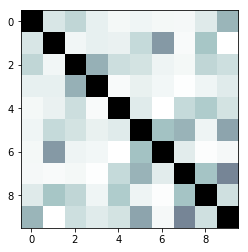

In [40]:
import numpy as np 
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [41]:
def getMinMax_XY(training_input):  
    ages_g = np.array([])
    ages_b =np.array([])
    gross_g = np.array([])
    gross_b =np.array([])
    spend_g = np.array([])
    spend_b =np.array([])
    for k in training_input['G']:
        #print(k[0])
        ages_g = np.append(ages_g, k[0])
        gross_g = np.append(gross_g, k[1])
        spend_g = np.append(gross_g, k[2])
    for k in training_input['B']:
        ages_b = np.append(ages_b, k[0])
        gross_b = np.append(gross_b, k[1])
        spend_b = np.append(gross_g, k[2])
    # green is good < 50 
    green_x_max = max(ages_g)
    #blue is bad > 50 age
    blue_x_min = min(ages_b)
    
    green_y_min = min(gross_g)
    green_y_max = max(gross_g)
    
    blk_z_min = min(spend_g)
    blk_z_max = max(spend_b)
    return green_x_max, blue_x_min, green_y_max, green_y_min,blk_z_min, blk_z_max

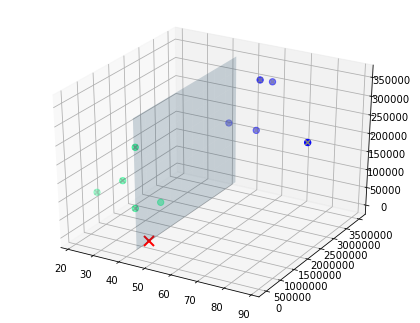

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import axes3d

trainingDataPoints = np.vstack((np.array(training_input['B']), np.array(training_input['G'])))
trainingLabels = [0]*len(training_input['B']) + [1]*len(training_input['G'])
green_x_max, blue_x_min, green_y_max, green_y_min , blk_z_min, blk_z_max = getMinMax_XY(training_input)

y_mean = green_y_min
x_mean = green_x_max
z_mean=blk_z_min

fig=plt.figure(figsize=(16,12.5))
ax=fig.add_subplot(2,2,1,projection="3d")
#Points for the line dividing the classes
xs = [result['svm']['bias'][0],green_x_max,blue_x_min]

ys = [blue_x_min,green_y_min,green_y_max]
zs = [5617732.962, 172383.90600000002, 5617732.90600000002] #[green_y_min, blk_z_min, blk_z_max]
ax.scatter(trainingDataPoints[:, 0], trainingDataPoints[:, 1],trainingDataPoints[:, 2], c=trainingLabels, s=40, cmap='winter', label='Data Points')
#Plot the support vectors
ax.scatter(np.array(result['svm']['support_vectors'][:,0]),np.array(result['svm']['support_vectors'][:,1]),np.array(result['svm']['support_vectors'][:,2]), s=25, c='grey', marker="x", label='Support Vectors')
#Plot the mean point
ax.plot([x_mean], [y_mean], 'x', color='red', markeredgewidth=2, markersize=10)

#Draw hyperplane
y = np.linspace(0,3500000,10)
z = np.linspace(0,350000,10)
Y, Z = np.meshgrid(y, z)
xs = np.array([44]*100)
X=xs.reshape(Z.shape)
ax.plot_surface(X, Y,Z, alpha=0.2)